In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

from pymatch import MLP, DataLoader
from pymatch.optimizer import sgd
from pymatch.functions import maxMarginLoss

In [2]:
# Set Parameters
epochs = 30
lr = 0.1
lrSchedulerStep = 10
batchSize = 4
num_classes = 2

# Create model
hiddenLayers = [8,8,1]
m = MLP(2, hiddenLayers)
criterion = maxMarginLoss

print(m)

MLP:
fcn        (in_c = 2, out_c = 8, act = relu
fcn        (in_c = 8, out_c = 8, act = relu
fcn        (in_c = 8, out_c = 1, act = identity



In [3]:
# # Generate data
X, Y = make_circles(n_samples=300, noise=0.01)
#X, Y = make_blobs(n_samples=300, centers=num_classes, n_features=2)
#X, Y = make_moons(n_samples=300, noise=0.1)

X_train, Y_train = X[0:200], Y[0:200]
X_test, Y_test = X[200:300], Y[200:300]

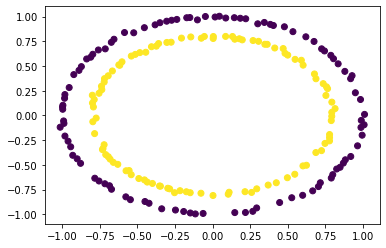

In [4]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)

In [5]:
# Create Data Loader
dl = DataLoader(X_train, Y_train, batchSize=batchSize, shuffle=True)

In [6]:
# Train
print('Train for {} epochs.'.format(epochs))

for epoch in range(epochs):
    if (epoch+1) % lrSchedulerStep == 0:
        lr *= 0.5

    running_loss = 0
    running_correct = 0

    for batch in dl:
        loss = 0
        for (x, y) in batch:
            y = [2*y-1]

            pred = m(x)
            if (pred[0] >= 0 and y[0] >= 0) or (pred[0] < 0 and y[0] < 0):
                running_correct += 1
                
            loss = loss + criterion(pred, y, m, l1=False)
        loss = loss * (1/len(batch))

        loss.zero_grad()
        loss.backward()
        sgd(lr, loss)
        running_loss += loss
        
    print('Epoch: {}, Loss = {}, Acc = {}'.format(epoch, running_loss.val/len(dl), running_correct/len(dl)))

Train for 30 epochs.
Epoch: 0, Loss = 0.2300080741552323, Acc = 0.475
Epoch: 1, Loss = 0.2222189311081161, Acc = 0.5
Epoch: 2, Loss = 0.22232611302571725, Acc = 0.515
Epoch: 3, Loss = 0.2147043479922547, Acc = 0.535
Epoch: 4, Loss = 0.2119551436125063, Acc = 0.525
Epoch: 5, Loss = 0.20117024508780265, Acc = 0.54
Epoch: 6, Loss = 0.20914681703538243, Acc = 0.515
Epoch: 7, Loss = 0.20182503765401716, Acc = 0.55
Epoch: 8, Loss = 0.1915627617913891, Acc = 0.555
Epoch: 9, Loss = 0.1868370375721771, Acc = 0.62
Epoch: 10, Loss = 0.17117741102896558, Acc = 0.66
Epoch: 11, Loss = 0.16113163070835856, Acc = 0.715
Epoch: 12, Loss = 0.15446401688964603, Acc = 0.7
Epoch: 13, Loss = 0.1458159605488591, Acc = 0.75
Epoch: 14, Loss = 0.11973314056524086, Acc = 0.765
Epoch: 15, Loss = 0.12256169714733811, Acc = 0.765
Epoch: 16, Loss = 0.11271659594103793, Acc = 0.785
Epoch: 17, Loss = 0.10287773737275498, Acc = 0.81
Epoch: 18, Loss = 0.09917673636795075, Acc = 0.815
Epoch: 19, Loss = 0.06540245169223037

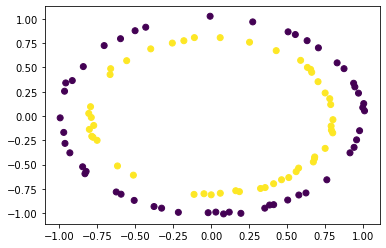

In [7]:
# Test
Y_pred = np.array([(m(x)[0].val > 0)*1.0 for x in X_test])

plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred)

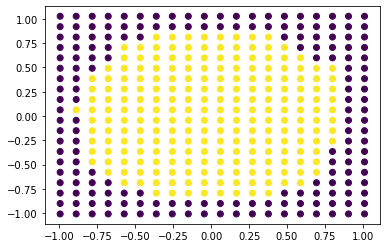

In [8]:
x_min_0 = np.min(X_test[:,0])
x_max_0 = np.max(X_test[:,0])
x_min_1 = np.min(X_test[:,1])
x_max_1 = np.max(X_test[:,1])

X_grid = []
for y in np.linspace(x_min_1, x_max_1, 20):
    X_grid += [[x, y] for x in np.linspace(x_min_0, x_max_0, 20)]
X_grid = np.array(X_grid)

Y_grid = np.array([(m(x)[0].val > 0)*1.0 for x in X_grid])

plt.scatter(X_grid[:,0], X_grid[:,1], c=Y_grid)